<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part5/P5_Ch02_CH02_03_TF_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP - Tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import sys
sys.path.append('/content/drive/MyDrive/#fastcampus')
!pip install -r '/content/drive/MyDrive/#fastcampus/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch_lightning-1.3.8-py3-none-any.whl (813 kB)
  Using cached torch_optimizer-0.1.0-py3-none-any.whl (72 kB)
  Using cached hydra_core-1.1.0-py3-none-any.whl (144 kB)
  Using cached wandb-0.11.1-py2.py3-none-any.whl (1.7 MB)
  Using cached torchtext-0.10.0-cp39-cp39-manylinux1_x86_64.whl (7.6 MB)
  Using cached spacy-2.2.4.tar.gz (6.1 MB)
  Installing build dependencies ... canceled
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/req_command.py", line 241, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/commands/install.py", line 419, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.9/dist

In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf


In [9]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
!nvidia-smi

Thu Apr 13 05:11:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
#define gpus strategy
mirrored_strategy = tf.distribute.MirroredStrategy()

## 데이터 및 데이터로더 정의

In [18]:
with mirrored_strategy.scope():
  # 데이터셋 정의
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  # normalization
  x_train =x_train/255.0
  x_test = x_test/255.0

  # train/val splits
  train_size = int(len(x_train)*0.9)
  val_size = len(x_train) -train_size

  dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size = 1024)
  test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(buffer_size = 1024)

  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size)
  print(len(train_dataset), len(val_dataset), len(dataset), len(test_dataset))

  # dataloader 정의
  train_batch_size =100
  val_batch_size =10
  test_batch_size =100

  train_dataloader = train_dataset.batch(train_batch_size, drop_remainder=True)
  val_dataloader = val_dataset.batch(val_batch_size, drop_remainder=True)
  test_dataloader = test_dataset.batch(test_batch_size, drop_remainder=True)

sample_example = next(iter(train_dataloader))
print(sample_example)

54000 6000 60000 10000
(<tf.Tensor: shape=(100, 28, 28), dtype=float64, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.      

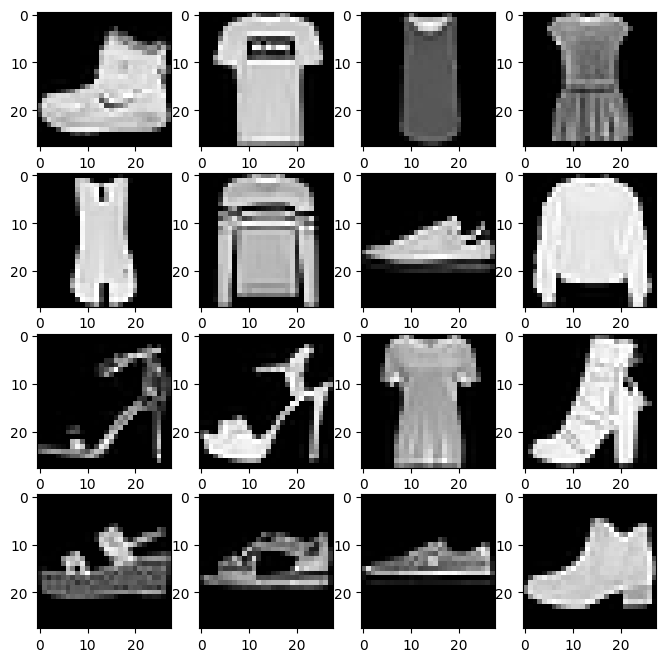

In [14]:
# plot figure
plt.figure(figsize = (8,8))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(x_train[c].reshape(28,28), cmap ='gray')
plt.show()